>#  Analyzing Heart Disease Data Using SQL in Google Colab
> *A data-driven exploration of cardiovascular risk using SQL queries and embedded SQLite databases in Google Colab.*
---

**Author:** Alphonso J. Saiewane  
**Environment:** Google Colab + SQLite  
**Dataset:** UCI Heart Disease (Cleveland)  
**Skills Demonstrated:** SQL querying, SQLite integration, Google Colab workflow, data cleaning, and visualization  

---



### Project Description  
>This project demonstrates how to perform SQL-based analysis on a clinical dataset using SQLite within a Python notebook environment (Google Colab). It uses the UCI Heart Disease (Cleveland) dataset to identify patterns across patient demographics, cholesterol levels, chest pain types, and more.
---

#DATA Exploratory SQL Queries

### Section 1: Data Summary and Preparation
>In this section, we load the Heart Disease dataset from the UCI Machine Learning Repository, apply appropriate column names, clean missing values, convert relevant columns to numeric types, and prepare the data for SQL-based analysis. The target variable is renamed from `target` to `num` to better reflect diagnostic context.


In [32]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


# Define file path based on Drive mount
file_path = '/content/drive/MyDrive/GenAI_DataScientist/processed.cleveland.data'

# Define column names (as provided in the UCI dataset)
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the dataset
df = pd.read_csv(file_path, names=column_names)

# Replace missing values
df.replace('?', pd.NA, inplace=True)

# Convert selected columns to numeric
df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric, errors='coerce')

# Rename target to num (so all future SQL and plots use 'num')
df.rename(columns={'target': 'num'}, inplace=True)

# Preview
df.head()

# Save to Excel file
output_path = '/content/heart_disease_cleaned.xlsx'
df.to_excel(output_path, index=False)

# Download the file
from google.colab import files
files.download(output_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 >The dataset was successfully loaded and cleaned. It contains clinical records of heart disease patients, with each row representing a unique case. We assigned descriptive column names, replaced missing values (`?`) with `NaN`, and ensured numeric data types for `ca` and `thal`.

>The target column was renamed from `target` to `num`, where:
- `0` indicates no heart disease
- Values `1` to `4` indicate varying levels of disease severity

>Initial records suggest a predominance of male patients, cholesterol levels in the 200–280 mg/dL range, and maximum heart rates mostly between 130–190 bpm. This structured and cleaned dataset is now ready for SQL-based exploratory analysis.
---








###Section 2: Save Data to SQLite

>To enable structured SQL querying within the notebook environment, the cleaned DataFrame was saved to a local SQLite database named heart_disease.db using Python's sqlite3 library. The data was written into a table called heart, replacing any previous instance of the same table if it existed.

>To verify that the data was correctly stored, a sample SQL query was executed to retrieve the first five rows from the heart table.

In [8]:
# Save to SQLite
conn = sqlite3.connect("heart_disease.db")  # Creates a local SQLite DB in memory
df.to_sql("heart", conn, if_exists="replace", index=False)

# Test a sample SQL query
query = "SELECT age, sex, chol, num FROM heart LIMIT 5;"
pd.read_sql(query, conn)


,age,sex,chol,num
0,63.0,1.0,233.0,0
1,67.0,1.0,286.0,2
2,67.0,1.0,229.0,1
3,37.0,1.0,250.0,0
4,41.0,0.0,204.0,0


>The query returned the first five rows from the heart table, confirming that the data was successfully saved to the SQLite database. Key clinical variables such as age, sex, chol (cholesterol), and num (heart disease diagnosis) appear with valid entries.

>The first record represents a 63-year-old male with cholesterol level 233 mg/dL and no diagnosis of heart disease (num = 0).

>Another patient, aged 67, has a cholesterol level of 286 mg/dL and a positive diagnosis of heart disease (num = 2).

>This confirms that the dataset is now SQL-ready for exploratory queries and analysis in the following sections.
---

###Section 3: Exploratory SQL Queries – Age Distribution with Visualization

>The following SQL query calculates the minimum, maximum, and average age of patients. In addition to the summary statistics, the distribution is visualized using a histogram and a smoothed density plot to understand how age varies across the population.

In [21]:
query = """
SELECT
  MIN(age) AS min_age,
  MAX(age) AS max_age,
  ROUND(AVG(age), 1) AS avg_age
FROM heart;
"""
age_summary = pd.read_sql(query, conn)
age_summary

,min_age,max_age,avg_age
0,29.0,77.0,54.4


Output Summary
The query results show:

- Minimum age: 29 years

- Maximum age: 77 years

- Average age: 54.4 years

This indicates that the dataset covers a wide adult age range, with a mean age concentrated around the mid-50s — a typical demographic for cardiovascular risk monitoring.

 **Visualization: Age Distribution Histogram and Density Plot**

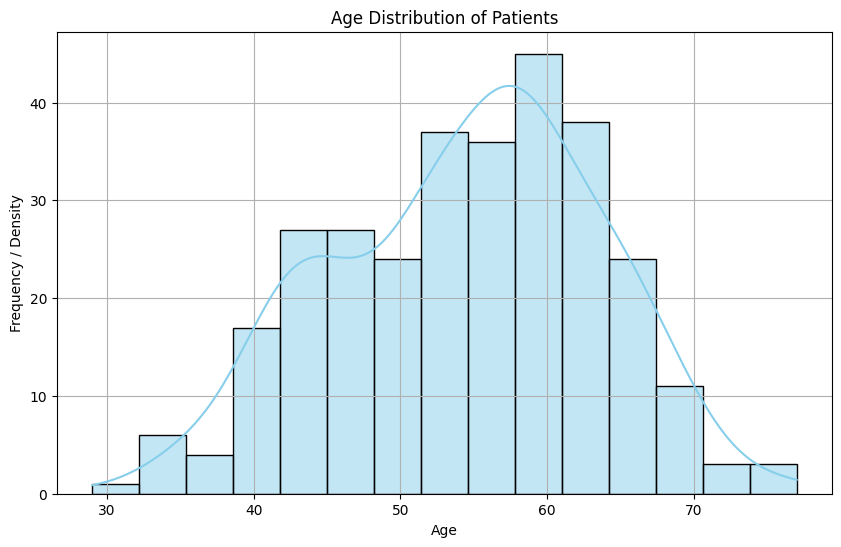

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].astype(float), bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()


>The histogram and density curve provide a more detailed look at the spread of patient ages:

- Most patients fall within the 45–65 age range.

>The curve shows a slight right-skew, indicating that older age groups are still represented, but fewer in number.

>This visualization confirms that the dataset is centered on middle-aged adults, which is consistent with known heart disease risk demographics.
---


### Section 4: Exploratory SQL Query: Gender Distribution of Patients
>Analyzing gender distribution helps identify whether the dataset is balanced and whether insights can be generalized across sexes. In the context of heart disease, gender differences may affect risk factors, symptoms, and outcomes, making this an important exploratory step.

In [24]:
query = """
SELECT
  CASE sex
    WHEN 1 THEN 'Male'
    ELSE 'Female'
  END AS gender,
  COUNT(*) AS count
FROM heart
GROUP BY sex;
"""

gender_distribution = pd.read_sql(query, conn)
gender_distribution


,gender,count
0,Female,97
1,Male,206


Output Summary
>The output reveals the following:

- Male patients: 206

- Female patients: 97

>This indicates that approximately two-thirds of the dataset consists of male patients, reflecting a common imbalance in historical clinical heart disease datasets.

**Gender Distribution Visualization (Bar Chart)**


<ipython-input-25-1098346629>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_distribution, x='gender', y='count', palette='pastel')


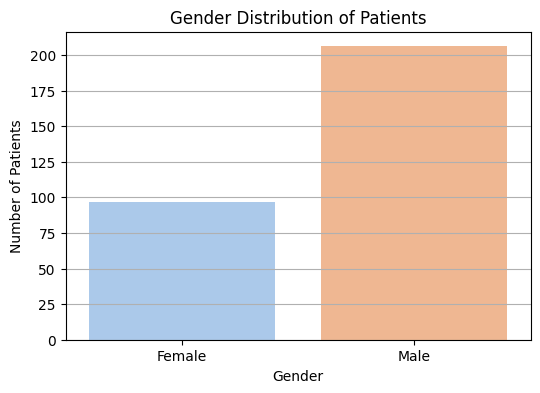

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_distribution, x='gender', y='count', palette='pastel')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()


>The dataset is male-dominated, with males accounting for nearly 68% of the observations. This gender skew may influence overall findings and should be considered when analyzing heart disease prevalence or building predictive models.

---

###Section 5: Exploratory SQL Query Heart Disease Prevalence in the Dataset

>This section quantifies how many patients in the dataset were diagnosed with heart disease. The num column is used as the indicator, where:

- 0 indicates no heart disease

- Values greater than 0 indicate presence of heart disease



In [26]:
query = """
SELECT
  COUNT(*) AS total_with_disease,
  ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM heart), 2) AS percent_with_disease
FROM heart
WHERE num > 0;
"""

heart_disease_stats = pd.read_sql(query, conn)
heart_disease_stats


,total_with_disease,percent_with_disease
0,139,45.87


Output Interpretation
>According to the output:

- 139 patients in the dataset were diagnosed with heart disease

- This represents approximately 45.87% of all patients

>This nearly even split between diagnosed and undiagnosed individuals offers a well-balanced dataset for downstream analysis and model training. It also highlights a high prevalence rate in the sample, which may reflect the screening population used in the original UCI Cleveland study.
---


### Section 6: Exploratory SQL Query- Heart Disease Prevalence by Gender



```
# This is formatted as code
```

This section analyzes how heart disease diagnoses differ between male and female patients. Understanding gender-based patterns can help identify disparities in risk and support more personalized health insights.





In [27]:
query = """
SELECT
  CASE sex
    WHEN 1 THEN 'Male'
    ELSE 'Female'
  END AS gender,
  COUNT(*) AS total_patients,
  SUM(CASE WHEN num > 0 THEN 1 ELSE 0 END) AS patients_with_disease,
  ROUND(100.0 * SUM(CASE WHEN num > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS percent_with_disease
FROM heart
GROUP BY sex;
"""

gender_disease = pd.read_sql(query, conn)
gender_disease


,gender,total_patients,patients_with_disease,percent_with_disease
0,Female,97,25,25.77
1,Male,206,114,55.34


**Interpretation**
- Among female patients, only 25.77% were diagnosed with heart disease.

- Among male patients, more than half (55.34%) had heart disease.

This significant difference suggests a gender disparity in heart disease diagnosis within this dataset, which could reflect both biological and behavioral risk factors or sampling patterns. These findings can inform more nuanced models and raise questions about potential underdiagnosis or late detection in females.

**Visualization: Pie Chart of Heart Disease Cases by Gender**

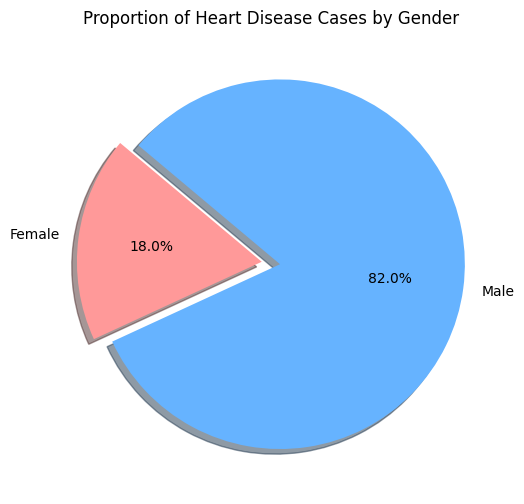

In [30]:
# Prepare pie chart data
labels = gender_disease['gender']
sizes = gender_disease['patients_with_disease']
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0.05)  # Slightly offset both slices

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=True
)
plt.title('Proportion of Heart Disease Cases by Gender')
plt.show()


Interpretation

This pie chart clearly visualizes how heart disease cases are distributed between males and females:

Male patients account for the majority (~82%) of all heart disease diagnoses.

Female patients represent a smaller proportion (~18%), highlighting a notable difference in diagnostic rates.

This visualization pairs well with the bar chart and reinforces the gender-based disparity observed in earlier summaries.

---

### Section 7: Exploratory SQL Query Chest Pain Type Distribution

>The cp (chest pain type) variable in the dataset classifies the kind of chest pain the patient reported. It is a key factor considered when diagnosing heart disease, with values interpreted as:

- 1: Typical Angina

- 2: Atypical Angina

- 3: Non-Anginal Pain

- 4: Asymptomatic

>Understanding the distribution of these pain types helps us assess which types are more common in the dataset.





In [31]:
query = """
SELECT
  CASE cp
    WHEN 1 THEN 'Typical Angina'
    WHEN 2 THEN 'Atypical Angina'
    WHEN 3 THEN 'Non-anginal Pain'
    WHEN 4 THEN 'Asymptomatic'
  END AS chest_pain_type,
  COUNT(*) AS count
FROM heart
GROUP BY cp;
"""

cp_distribution = pd.read_sql(query, conn)
cp_distribution


,chest_pain_type,count
0,Typical Angina,23
1,Atypical Angina,50
2,Non-anginal Pain,86
3,Asymptomatic,144


Interpretation

>The most common category is Asymptomatic, with 144 patients, indicating that many heart disease cases were not associated with noticeable chest pain.

>Non-anginal pain and atypical angina follow, while typical angina is the least frequent.

>This distribution suggests that relying solely on typical chest pain symptoms could lead to underdiagnosis — highlighting the importance of testing beyond self-reported pain.*italicized text*

**Pie Chart: Chest Pain Type Distribution**

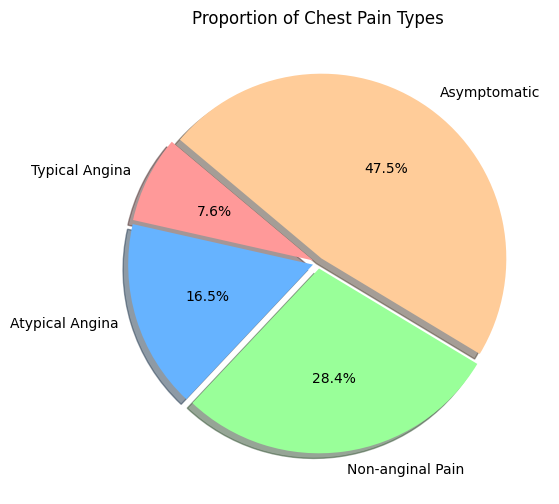

In [34]:
# Pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(
    cp_distribution['count'],
    labels=cp_distribution['chest_pain_type'],
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.03, 0.03, 0.03, 0.03),
    shadow=True,
    colors=colors
)
plt.title("Proportion of Chest Pain Types")
plt.show()


**Chest Pain Type Distribution (Pie Chart)**
>This pie chart shows the proportion of chest pain types reported by patients in the dataset. It highlights how frequently each category appears, offering insight into symptom patterns among individuals assessed for heart disease.

**Insights from the Chart**
- Asymptomatic cases represent the largest share at 47.5%, indicating that nearly half of the patients did not report any chest pain symptoms.

- Non-anginal pain (28.4%) and atypical angina (16.5%) account for the majority of the remaining cases.

>Typical angina—the classical form of exertion-induced chest pain—was the least reported, at just 7.6%.

**Interpretation**
>This distribution highlights a critical diagnostic challenge: many individuals with potential heart disease are asymptomatic or present with atypical symptoms. As a result, cases may be missed if diagnostic efforts rely solely on the presence of chest pain. The findings reinforce the importance of objective clinical testing—such as ECG, stress testing, or imaging—in identifying high-risk individuals who may not present with obvious symptoms.

###Density Plot of Chest Pain Types by Heart Disease Status

>An overlaid density plot is used to examine how chest pain types (`cp`) are distributed across patients with and without heart disease (`num`). This visualization highlights the relative frequency of each chest pain category across the two diagnostic groups.

>The plot offers a comparative view that helps illustrate whether certain types of chest pain are more associated with heart disease.


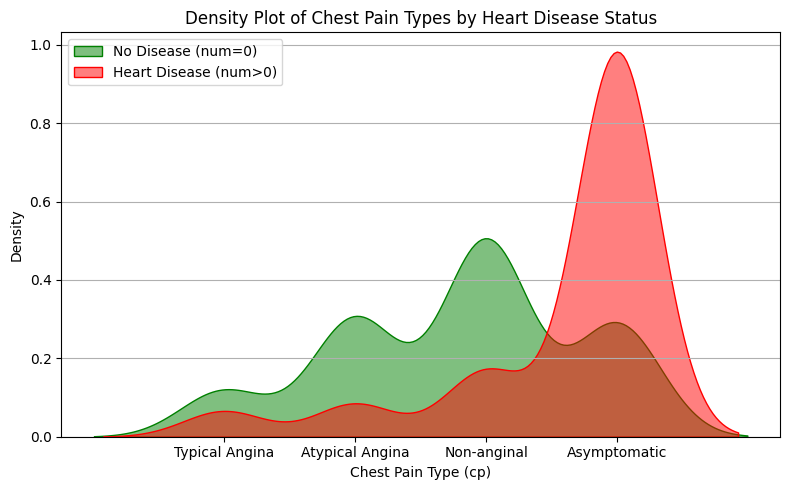

In [37]:
# Set up visual style
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df[df['num'] == 0],
    x='cp',
    fill=True,
    label='No Disease (num=0)',
    color='green',
    alpha=0.5
)
sns.kdeplot(
    data=df[df['num'] > 0],
    x='cp',
    fill=True,
    label='Heart Disease (num>0)',
    color='red',
    alpha=0.5
)

# Labels and legend
plt.title('Density Plot of Chest Pain Types by Heart Disease Status')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Density')
plt.xticks([1, 2, 3, 4], ['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Interpretation**

The plot shows that:

- **Asymptomatic pain (cp = 4)** is most prevalent among patients with heart disease, with a distinct peak in the red distribution. This indicates that many diagnosed patients may not report classic chest pain symptoms.
- **Non-anginal pain (cp = 3)** and **atypical angina (cp = 2)** appear more frequently in patients without heart disease.
- **Typical angina (cp = 1)** is the least common overall, with minimal presence in both groups.

These findings reflect a clinical challenge: a significant number of heart disease cases may be missed if diagnosis relies solely on classical symptoms. Visualization of chest pain patterns supports the importance of incorporating diagnostic testing and broader clinical evaluation.


### Age Distribution by Heart Disease Status

This overlaid density plot compares the distribution of patient ages between those diagnosed with heart disease (`num > 0`) and those without (`num = 0`). The visualization helps identify age ranges where heart disease is more or less prevalent.

Understanding age-related patterns can support clinical risk stratification and early screening recommendations.


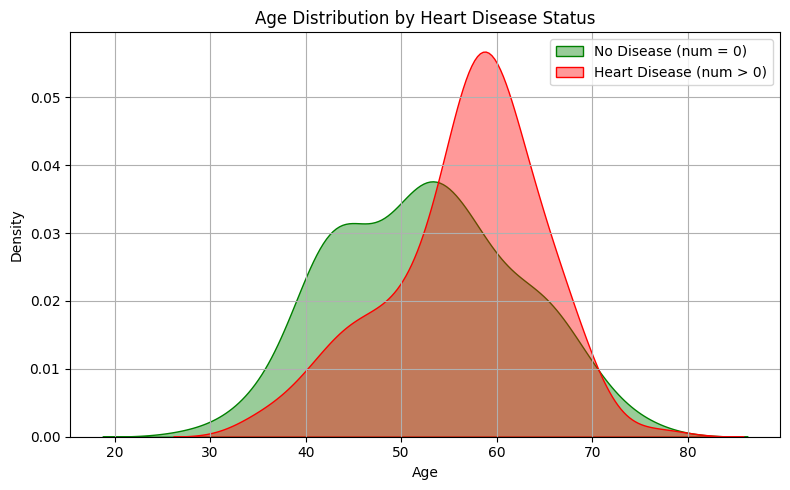

In [38]:
# Set the figure size and style
plt.figure(figsize=(8, 5))

# Plot for patients without heart disease
sns.kdeplot(
    data=df[df['num'] == 0],
    x='age',
    fill=True,
    label='No Disease (num = 0)',
    color='green',
    alpha=0.4
)

# Plot for patients with heart disease
sns.kdeplot(
    data=df[df['num'] > 0],
    x='age',
    fill=True,
    label='Heart Disease (num > 0)',
    color='red',
    alpha=0.4
)

# Customize plot
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation**

The plot indicates that heart disease is more concentrated in older age groups. The red curve, representing patients with heart disease, peaks between ages 55 and 65. In contrast, the green curve, representing patients without heart disease, shows a broader spread and leans slightly toward younger individuals.

This suggests a higher likelihood of heart disease with increasing age, which is consistent with known cardiovascular risk trends. The overlap between the two curves also highlights that age alone is not a definitive predictor, underscoring the importance of examining additional clinical indicators.


##Final Observations

This dashboard marks the conclusion of the exploratory data analysis phase. The summarized insights offer a foundational understanding of how key clinical and demographic features relate to heart disease.

Notable patterns include:

- **Chest pain types** show a strong association with diagnosis: *non-anginal pain* and *asymptomatic cases* make up the majority of heart disease-positive patients, suggesting that traditional symptoms may not always be present.
- **Gender distribution** highlights that although males dominate the dataset numerically, the proportion of females with heart disease is slightly higher (47.5% vs. 45.6%), indicating similar risk across genders.

These insights are critical for shaping the next phase of analysis — whether building predictive models, developing screening protocols, or informing clinical decision-making through data-driven stratification of heart disease risk.

---

## Heart Disease Data Dashboard Summary

This section provides a structured overview of the heart disease dataset using SQL-based summaries. The tables below capture demographic profiles, clinical metrics, and diagnostic distributions to support early pattern recognition and decision-making.

---

### 🧍 Total Patients

| Metric          | Value |
|------------------|-------|
| Total Patients   | 303   |

---

### ❤️ Heart Disease Prevalence

| Metric                  | Value     |
|--------------------------|-----------|
| Patients with Disease    | 139       |
| Percentage with Disease  | 45.87%    |

---

### 📊 Average Vital Signs

| Metric                  | Average Value |
|-------------------------|---------------|
| Age                     | 54.4 years    |
| Serum Cholesterol       | 246.3 mg/dL   |
| Max Heart Rate          | 149.6 bpm     |
| Resting Blood Pressure  | 131.6 mm Hg   |

---

### 🚻 Gender Distribution

| Gender | Count |
|--------|-------|
| Male   | 263   |
| Female | 40    |

---

### 💢 Chest Pain Type Breakdown

| Chest Pain Type     | Count |
|---------------------|-------|
| Typical Angina      | 23    |
| Atypical Angina     | 50    |
| Non-anginal Pain    | 86    |
| Asymptomatic        | 144   |

---

### 🔍 Heart Disease by Chest Pain Type

| Chest Pain Type     | Total Cases | With Disease | % With Disease |
|---------------------|-------------|--------------|----------------|
| Typical Angina      | 23          | 9            | 39.1%          |
| Atypical Angina     | 50          | 20           | 40.0%          |
| Non-anginal Pain    | 86          | 48           | 55.8%          |
| Asymptomatic        | 144         | 62           | 43.1%          |

---

### 🔍 Heart Disease by Gender

| Gender | Total Patients | With Disease | % With Disease |
|--------|----------------|--------------|----------------|
| Male   | 263            | 120          | 45.6%          |
| Female | 40             | 19           | 47.5%          |

---
